In [23]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [22]:

yelp_data = pd.read_csv(
    filepath_or_buffer = r"C:\Users\visha\Desktop\data\Yelp_Usefulness_Assignment2_3.csv", sep = ",", header=0 )

In [21]:
yelp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
word_count               1000 non-null int64
lexical_diversity        1000 non-null int64
correct_spell_ratio      1000 non-null int64
price_included           1000 non-null int64
procon_included          1000 non-null int64
joy                      1000 non-null int64
love                     1000 non-null int64
affection                1000 non-null int64
liking                   1000 non-null int64
enthusiasm               1000 non-null int64
sadness                  1000 non-null int64
dislike                  1000 non-null int64
despair                  1000 non-null int64
horror                   1000 non-null int64
distress                 1000 non-null int64
FleschReadingEase        1000 non-null int64
user_review_count        1000 non-null int64
yelping_months           1000 non-null int64
degree                   1000 non-null int64
betweenness              1000 non-null 

In [20]:
yelp_data = yelp_data.iloc[:,1:]

In [19]:
yelp_data

,review_stars,word_count,lexical_diversity,correct_spell_ratio,price_included,procon_included,joy,love,affection,liking,...,distress,FleschReadingEase,user_review_count,yelping_months,degree,betweenness,eigenvector,business_stars,business_review_count,class
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,0,1,1,0,0,0,0,0,...,0,0,1,1,1,0,1,1,0,1
996,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,1,1,1,1
997,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
998,1,1,0,1,0,0,0,1,0,0,...,1,1,0,1,0,0,0,0,0,0


In [18]:
frequent_itemsets = apriori(yelp_data, min_support=0.3, use_colnames=True)

print(frequent_itemsets.head())

   support               itemsets
0    0.629         (review_stars)
1    0.349           (word_count)
2    0.501    (lexical_diversity)
3    0.539  (correct_spell_ratio)
4    1.000              (dislike)


In [15]:
frequent_itemsets = apriori(yelp_data, min_support=0.3, use_colnames=True)

print(frequent_itemsets)

    support                                           itemsets
0     0.629                                     (review_stars)
1     0.349                                       (word_count)
2     0.501                                (lexical_diversity)
3     0.539                              (correct_spell_ratio)
4     1.000                                          (dislike)
5     0.541                                (FleschReadingEase)
6     0.456                                   (yelping_months)
7     0.590                                   (business_stars)
8     0.493                                            (class)
9     0.365                  (review_stars, lexical_diversity)
10    0.344                (correct_spell_ratio, review_stars)
11    0.629                            (review_stars, dislike)
12    0.319                  (review_stars, FleschReadingEase)
13    0.461                     (review_stars, business_stars)
14    0.349                              (dislike, word

In [14]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules)

                              antecedents  \
0                          (review_stars)   
1                     (lexical_diversity)   
2                   (correct_spell_ratio)   
3                          (review_stars)   
4                          (review_stars)   
..                                    ...   
57                    (FleschReadingEase)   
58  (correct_spell_ratio, business_stars)   
59                              (dislike)   
60    (business_stars, FleschReadingEase)   
61                              (dislike)   

                              consequents  antecedent support  \
0                     (lexical_diversity)               0.629   
1                          (review_stars)               0.501   
2                          (review_stars)               0.539   
3                   (correct_spell_ratio)               0.629   
4                               (dislike)               0.629   
..                                    ...                 ...   
57  

In [13]:
rules = rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.50) ]

print(rules.head(150))

                                 antecedents                     consequents  \
0                             (review_stars)             (lexical_diversity)   
1                        (lexical_diversity)                  (review_stars)   
2                      (correct_spell_ratio)                  (review_stars)   
3                             (review_stars)           (correct_spell_ratio)   
4                             (review_stars)                       (dislike)   
5                                  (dislike)                  (review_stars)   
6                             (review_stars)                (business_stars)   
7                           (business_stars)                  (review_stars)   
9                               (word_count)                       (dislike)   
10                                 (dislike)             (lexical_diversity)   
11                       (lexical_diversity)                       (dislike)   
12                       (lexical_divers

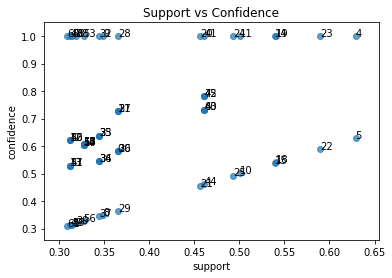

In [24]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.7)
for i in range(rules.shape[0]):
    plt.text(rules.loc[i,"support"], rules.loc[i,"confidence"], str(i))
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()